In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('/content/gdrive/MyDrive/Colab Notebooks/emnist-balanced-train.csv')

In [ ]:
print(df.shape)

(112799, 785)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112799 entries, 0 to 112798
Columns: 785 entries, 45 to 0.533
dtypes: int64(785)
memory usage: 675.6 MB


0123456789ABCDEFGHIJKLMNOPQRSTUVWXYZabdefghnqrt'

In [ ]:
df.head()

,45,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,0.10,0.11,0.12,0.13,0.14,0.15,0.16,0.17,0.18,0.19,0.20,0.21,0.22,0.23,0.24,0.25,0.26,0.27,0.28,0.29,0.30,0.31,0.32,0.33,0.34,0.35,0.36,0.37,0.38,...,0.494,0.495,0.496,0.497,0.498,0.499,0.500,0.501,0.502,0.503,0.504,0.505,0.506,0.507,0.508,0.509,0.510,0.511,0.512,0.513,0.514,0.515,0.516,0.517,0.518,0.519,0.520,0.521,0.522,0.523,0.524,0.525,0.526,0.527,0.528,0.529,0.530,0.531,0.532,0.533
0,36,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,43,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,15,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,42,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
df.describe()

,45,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,0.10,0.11,0.12,0.13,0.14,0.15,0.16,0.17,0.18,0.19,0.20,0.21,0.22,0.23,0.24,0.25,0.26,0.27,0.28,0.29,0.30,0.31,0.32,0.33,0.34,0.35,0.36,0.37,0.38,...,0.494,0.495,0.496,0.497,0.498,0.499,0.500,0.501,0.502,0.503,0.504,0.505,0.506,0.507,0.508,0.509,0.510,0.511,0.512,0.513,0.514,0.515,0.516,0.517,0.518,0.519,0.520,0.521,0.522,0.523,0.524,0.525,0.526,0.527,0.528,0.529,0.530,0.531,0.532,0.533
count,112799.000000,112799.0,112799.0,112799.0,112799.0,112799.000000,112799.000000,112799.000000,112799.000000,112799.000000,112799.000000,112799.000000,112799.000000,112799.000000,112799.000000,112799.000000,112799.000000,112799.000000,112799.000000,112799.000000,112799.000000,112799.000000,112799.000000,112799.000000,112799.000000,112799.0,112799.0,112799.0,112799.0,112799.0,112799.000000,112799.000000,112799.000000,112799.000000,112799.000000,112799.000000,112799.000000,112799.000000,112799.000000,112799.000000,...,112799.000000,112799.000000,112799.000000,112799.000000,112799.000000,112799.000000,112799.000000,112799.00000,112799.000000,112799.000000,112799.000000,112799.0,112799.0,112799.0,112799.000000,112799.000000,112799.000000,112799.000000,112799.000000,112799.000000,112799.000000,112799.000000,112799.000000,112799.000000,112799.000000,112799.000000,112799.000000,112799.000000,112799.000000,112799.000000,112799.000000,112799.0,112799.0,112799.000000,112799.000000,112799.0,112799.0,112799.0,112799.0,112799.0
mean,22.999805,0.0,0.0,0.0,0.0,0.001365,0.011560,0.020701,0.017438,0.018475,0.015656,0.006800,0.005168,0.005408,0.002163,0.006817,0.011383,0.012766,0.011099,0.009583,0.004734,0.004504,0.003644,0.001986,0.000718,0.0,0.0,0.0,0.0,0.0,0.000177,0.005071,0.023555,0.059593,0.137758,0.222449,0.273894,0.273247,0.246651,0.200427,...,0.207032,0.202085,0.181917,0.149017,0.125905,0.095905,0.068591,0.05391,0.036569,0.013050,0.000887,0.0,0.0,0.0,0.000018,0.002872,0.006020,0.002305,0.000496,0.001986,0.002624,0.008271,0.001401,0.001126,0.002376,0.002296,0.002092,0.002305,0.002252,0.001950,0.000310,0.0,0.0,0.002163,0.000284,0.0,0.0,0.0,0.0,0.0
std,13.564622,0.0,0.0,0.0,0.0,0.235048,1.221831,1.658805,1.602485,1.719556,1.614505,0.832289,0.835554,0.933282,0.458121,0.821967,1.243060,1.333685,1.366941,1.075975,0.778277,0.987491,0.758139,0.447827,0.192525,0.0,0.0,0.0,0.0,0.0,0.026631,0.284394,0.754910,1.355096,2.916609,4.115690,4.595491,4.416640,4.059597,3.342239,...,3.245815,3.127962,2.892991,2.405213,2.258832,1.934307,1.442400,1.30510,1.095763,0.646757,0.078546,0.0,0.0,0.0,0.005955,0.647923,1.000004,0.535528,0.097121,0.465227,0.653564,1.253606,0.284685,0.363410,0.688625,0.476159,0.602670,0.612040,0.729972,0.655043,0.104211,0.0,0.0,0.726503,0.095279,0.0,0.0,0.0,0.0,0.0
min,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
25%,11.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
50%

In [ ]:
X=df.drop('45',axis=1)
X=np.asarray(X)
X

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [ ]:
y=df['45']
y

0         36
1         43
2         15
3          4
4         42
          ..
112794    22
112795    17
112796    23
112797    31
112798     8
Name: 45, Length: 112799, dtype: int64

In [ ]:
df.isnull().sum()

45       0
0        0
0.1      0
0.2      0
0.3      0
        ..
0.529    0
0.530    0
0.531    0
0.532    0
0.533    0
Length: 785, dtype: int64

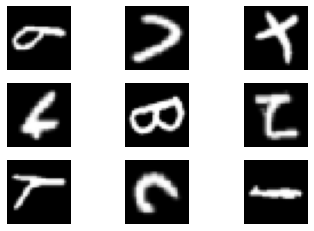

In [ ]:
for i in range(9):
  digit=X[40000+i]
  digit_img=digit.reshape(28,28)
  plt.subplot(330 + 1 + i)
  plt.imshow(digit_img,cmap=plt.get_cmap('gray'))
  plt.axis('off')
plt.show()

the data need rotation

In [ ]:
def rotate(x):
    x = x.reshape([28, 28])
    x = np.fliplr(x)
    x = np.rot90(x)
    return x

In [ ]:
X = np.apply_along_axis(rotate, 1, X)

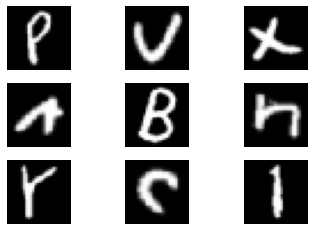

In [ ]:
for i in range(9):
  digit=X[40000+i]
  plt.subplot(330 + 1 + i)
  plt.imshow(digit,cmap=plt.get_cmap('gray'))
  plt.axis('off')
plt.show()

# Normalizing

In [ ]:
X=X/255.0

In [ ]:
X = X.reshape(-1, 28, 28, 1)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size= 0.10, random_state=7)


# Model

In [ ]:
import tensorflow as tf
from tensorflow import keras


In [ ]:
model = keras.models.Sequential()
model.add(keras.layers.Conv2D(32,3,padding  ='same',activation='relu',input_shape=(28,28,1)))
model.add(keras.layers.MaxPool2D(pool_size=(2,2)))
model.add(keras.layers.Conv2D(64,3,padding  ='same',activation='relu'))
model.add(keras.layers.MaxPool2D(pool_size=(2,2)))
model.add(keras.layers.Conv2D(128,3,padding  ='same',activation='relu'))
model.add(keras.layers.MaxPool2D(pool_size=(2,2)))
#until here the outpuy is 2D,so to work with dense we need to flatten 
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(256, activation = "relu"))
model.add(keras.layers.Dropout(0.25))
model.add(keras.layers.Dense(128, activation = "relu"))
model.add(keras.layers.Dropout(0.25))
model.add(keras.layers.Dense(47, activation = "softmax"))

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 28, 28, 32)        320       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 14, 14, 64)        18496     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 7, 7, 128)         73856     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 3, 3, 128)         0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 1152)             

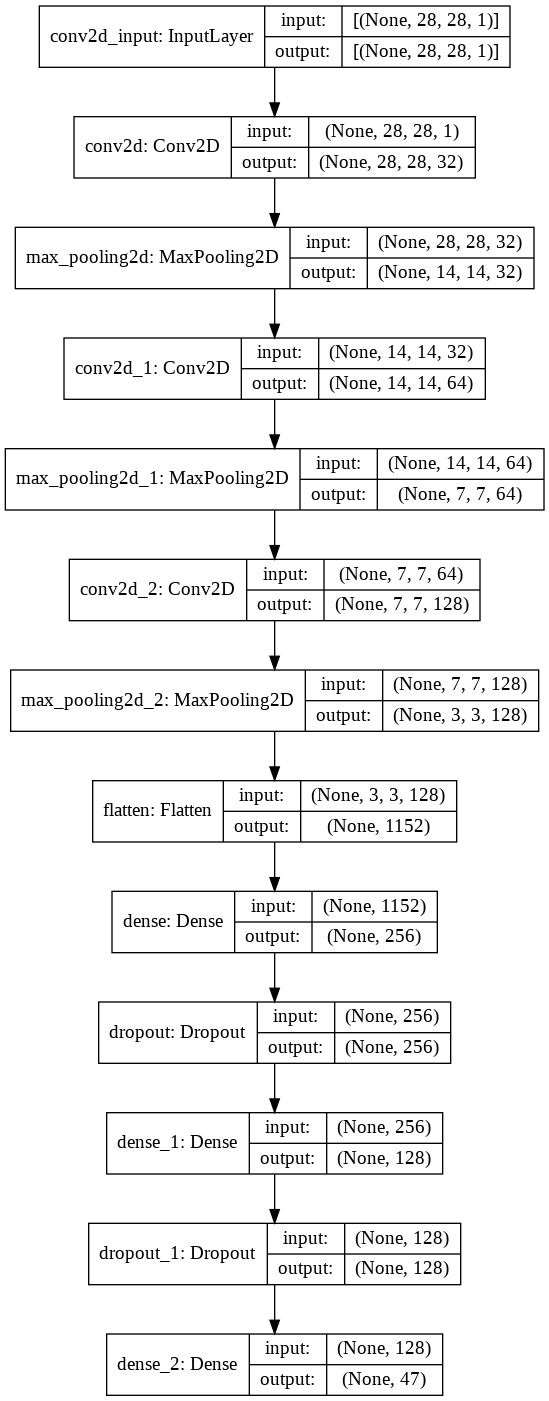

In [ ]:
keras.utils.plot_model(model, "model.png", show_shapes=True)

In [ ]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="adam",
              metrics=["accuracy"])

In [ ]:
model.fit(X_train,y_train, validation_data=(X_val,y_val), epochs=25,batch_size=256)


Epoch 1/25
397/397 [==============================] - 157s 393ms/step - loss: 1.2164 - accuracy: 0.6362 - val_loss: 0.4717 - val_accuracy: 0.8396
Epoch 2/25
397/397 [==============================] - 156s 392ms/step - loss: 0.5365 - accuracy: 0.8196 - val_loss: 0.3857 - val_accuracy: 0.8604
Epoch 3/25
397/397 [==============================] - 155s 390ms/step - loss: 0.4475 - accuracy: 0.8476 - val_loss: 0.3705 - val_accuracy: 0.8658
Epoch 4/25
397/397 [==============================] - 156s 392ms/step - loss: 0.4006 - accuracy: 0.8595 - val_loss: 0.3437 - val_accuracy: 0.8753
Epoch 5/25
397/397 [==============================] - 154s 389ms/step - loss: 0.3719 - accuracy: 0.8680 - val_loss: 0.3327 - val_accuracy: 0.8779
Epoch 6/25
397/397 [==============================] - 155s 390ms/step - loss: 0.3467 - accuracy: 0.8765 - val_loss: 0.3232 - val_accuracy: 0.8803
Epoch 7/25
397/397 [==============================] - 155s 390ms/step - loss: 0.3320 - accuracy: 0.8802 - val_loss: 0.3222 -

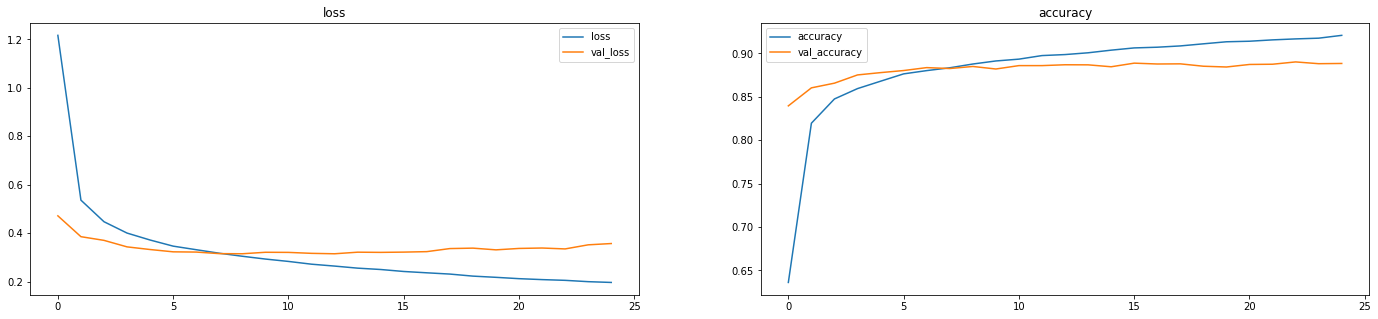

In [ ]:

f,ax=plt.subplots(1,2,figsize=(24,5))
ax[0].plot(pd.DataFrame(model.history.history)[['loss','val_loss']],label=['loss','val_loss'])
ax[0].set_title('loss')
ax[0].legend(['loss', 'val_loss'])
ax[1].plot(pd.DataFrame(model.history.history)[['accuracy','val_accuracy']])
ax[1].set_title('accuracy')
ax[1].legend(['accuracy', 'val_accuracy'])
plt.show()


In [ ]:
#2nd try  
model2 = keras.models.Sequential()
model2.add(keras.layers.Conv2D(16,3,padding  ='same',activation='tanh',input_shape=(28,28,1)))
model2.add(keras.layers.MaxPool2D(pool_size=(2,2)))
model2.add(keras.layers.Conv2D(32,3,padding  ='same',activation='tanh'))
model2.add(keras.layers.MaxPool2D(pool_size=(2,2)))
model2.add(keras.layers.Conv2D(64,3,padding  ='same',activation='tanh'))
model2.add(keras.layers.MaxPool2D(pool_size=(2,2)))
#until here the outpuy is 2D,so to work with dense we need to flatten 
model2.add(keras.layers.Flatten())
model2.add(keras.layers.Dense(256, activation = "tanh"))
model2.add(keras.layers.Dense(128, activation = "tanh"))
model2.add(keras.layers.Dense(47, activation = "softmax"))


In [ ]:
model2.compile(loss="sparse_categorical_crossentropy",
              optimizer="adam",
              metrics=["accuracy"])

In [ ]:
model2.fit(X_train,y_train, validation_data=(X_val,y_val), epochs=30,batch_size=256)


Epoch 1/30
397/397 [==============================] - 76s 189ms/step - loss: 0.8828 - accuracy: 0.7472 - val_loss: 0.4873 - val_accuracy: 0.8365
Epoch 2/30
397/397 [==============================] - 74s 186ms/step - loss: 0.4189 - accuracy: 0.8575 - val_loss: 0.4174 - val_accuracy: 0.8552
Epoch 3/30
397/397 [==============================] - 74s 187ms/step - loss: 0.3590 - accuracy: 0.8739 - val_loss: 0.3738 - val_accuracy: 0.8677
Epoch 4/30
397/397 [==============================] - 74s 187ms/step - loss: 0.3241 - accuracy: 0.8827 - val_loss: 0.3661 - val_accuracy: 0.8682
Epoch 5/30
397/397 [==============================] - 74s 187ms/step - loss: 0.2967 - accuracy: 0.8923 - val_loss: 0.3687 - val_accuracy: 0.8671
Epoch 6/30
397/397 [==============================] - 74s 187ms/step - loss: 0.2748 - accuracy: 0.8986 - val_loss: 0.3472 - val_accuracy: 0.8771
Epoch 7/30
397/397 [==============================] - 74s 186ms/step - loss: 0.2548 - accuracy: 0.9050 - val_loss: 0.3550 - val_ac

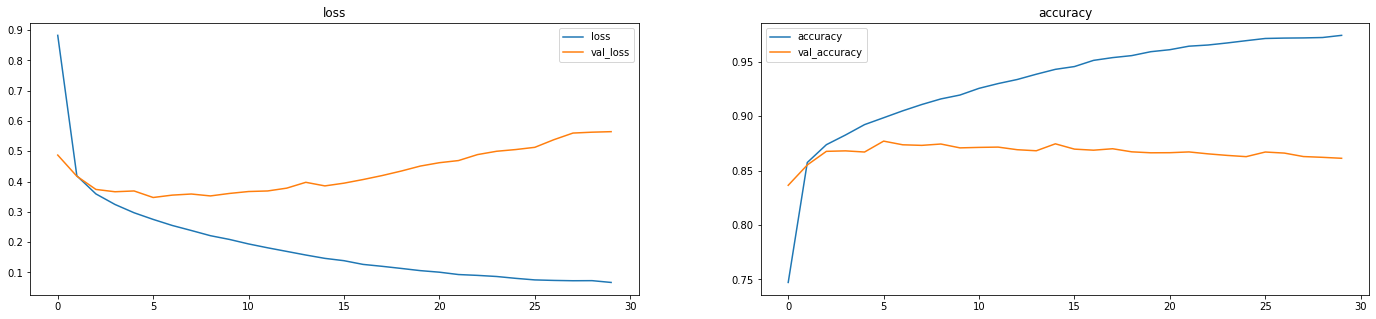

In [ ]:

f,ax=plt.subplots(1,2,figsize=(24,5))
ax[0].plot(pd.DataFrame(model2.history.history)[['loss','val_loss']],label=['loss','val_loss'])
ax[0].set_title('loss')
ax[0].legend(['loss', 'val_loss'])
ax[1].plot(pd.DataFrame(model2.history.history)[['accuracy','val_accuracy']])
ax[1].set_title('accuracy')
ax[1].legend(['accuracy', 'val_accuracy'])
plt.show()


this model extremely over fit the data

In [ ]:
#3rd try  
model3 = keras.models.Sequential()
model3.add(keras.layers.Conv2D(16,3,padding  ='same',activation='relu',input_shape=(28,28,1)))
model3.add(keras.layers.AveragePooling2D(pool_size=(2,2)))
model3.add(keras.layers.Conv2D(32,3,padding  ='same',activation='relu'))
model3.add(keras.layers.AveragePooling2D(pool_size=(2,2)))
model3.add(keras.layers.Conv2D(64,3,padding  ='same',activation='relu'))
model3.add(keras.layers.AveragePooling2D(pool_size=(2,2)))
#until here the outpuy is 2D,so to work with dense we need to flatten 
model3.add(keras.layers.Flatten())
model3.add(keras.layers.Dense(256, activation = "tanh"))
model3.add(keras.layers.Dense(128, activation = "tanh"))
model3.add(keras.layers.Dense(47, activation = "softmax"))


In [ ]:
model3.compile(loss="sparse_categorical_crossentropy",
              optimizer="adam",
              metrics=["accuracy"])

In [ ]:
model3.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 28, 28, 16)        160       
_________________________________________________________________
average_pooling2d (AveragePo (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 14, 14, 32)        4640      
_________________________________________________________________
average_pooling2d_1 (Average (None, 7, 7, 32)          0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 7, 7, 64)          18496     
_________________________________________________________________
average_pooling2d_2 (Average (None, 3, 3, 64)          0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 576)              

In [ ]:
model3.fit(X_train,y_train, validation_data=(X_val,y_val), epochs=25,batch_size=256)


Epoch 1/25
397/397 [==============================] - 63s 159ms/step - loss: 1.1607 - accuracy: 0.6688 - val_loss: 0.5920 - val_accuracy: 0.8064
Epoch 2/25
397/397 [==============================] - 64s 160ms/step - loss: 0.5077 - accuracy: 0.8310 - val_loss: 0.4827 - val_accuracy: 0.8346
Epoch 3/25
397/397 [==============================] - 63s 160ms/step - loss: 0.4272 - accuracy: 0.8535 - val_loss: 0.4388 - val_accuracy: 0.8470
Epoch 4/25
397/397 [==============================] - 63s 160ms/step - loss: 0.3825 - accuracy: 0.8650 - val_loss: 0.4127 - val_accuracy: 0.8546
Epoch 5/25
397/397 [==============================] - 64s 161ms/step - loss: 0.3576 - accuracy: 0.8726 - val_loss: 0.3940 - val_accuracy: 0.8569
Epoch 6/25
397/397 [==============================] - 63s 159ms/step - loss: 0.3321 - accuracy: 0.8803 - val_loss: 0.3757 - val_accuracy: 0.8654
Epoch 7/25
397/397 [==============================] - 63s 160ms/step - loss: 0.3134 - accuracy: 0.8856 - val_loss: 0.3883 - val_ac

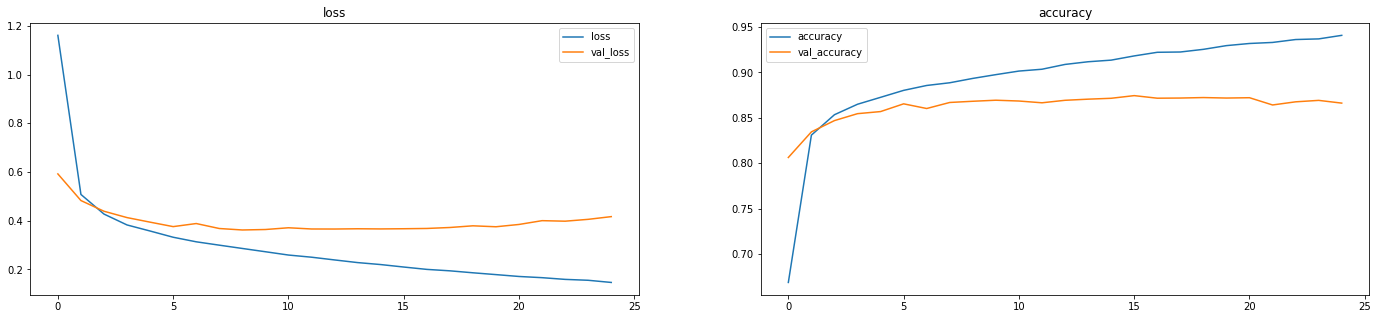

In [ ]:

f,ax=plt.subplots(1,2,figsize=(24,5))
ax[0].plot(pd.DataFrame(model3.history.history)[['loss','val_loss']],label=['loss','val_loss'])
ax[0].set_title('loss')
ax[0].legend(['loss', 'val_loss'])
ax[1].plot(pd.DataFrame(model3.history.history)[['accuracy','val_accuracy']])
ax[1].set_title('accuracy')
ax[1].legend(['accuracy', 'val_accuracy'])
plt.show()


Average pooling method smooths out the image and hence the sharp features may not be identified when this pooling method is used. Max pooling selects the brighter pixels from the image. It is useful when the background of the image is dark and we are interested in only the lighter pixels of the image.
which is preferable in our case



best model

In [ ]:
model = keras.models.Sequential()
model.add(keras.layers.Conv2D(32,3,padding  ='same',activation='relu',input_shape=(28,28,1)))
model.add(keras.layers.MaxPool2D(pool_size=(2,2)))
model.add(keras.layers.Conv2D(64,3,padding  ='same',activation='relu'))
model.add(keras.layers.MaxPool2D(pool_size=(2,2)))
model.add(keras.layers.Conv2D(128,3,padding  ='same',activation='relu'))
model.add(keras.layers.MaxPool2D(pool_size=(2,2)))
#until here the outpuy is 2D,so to work with dense we need to flatten 
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(256, activation = "relu"))
model.add(keras.layers.Dropout(0.25))
model.add(keras.layers.Dense(128, activation = "relu"))
model.add(keras.layers.Dropout(0.25))
model.add(keras.layers.Dense(47, activation = "softmax"))

In [ ]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="adam",
              metrics=["accuracy"])

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 28, 28, 32)        320       
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 14, 14, 64)        18496     
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 7, 7, 128)         73856     
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 3, 3, 128)         0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 1152)             

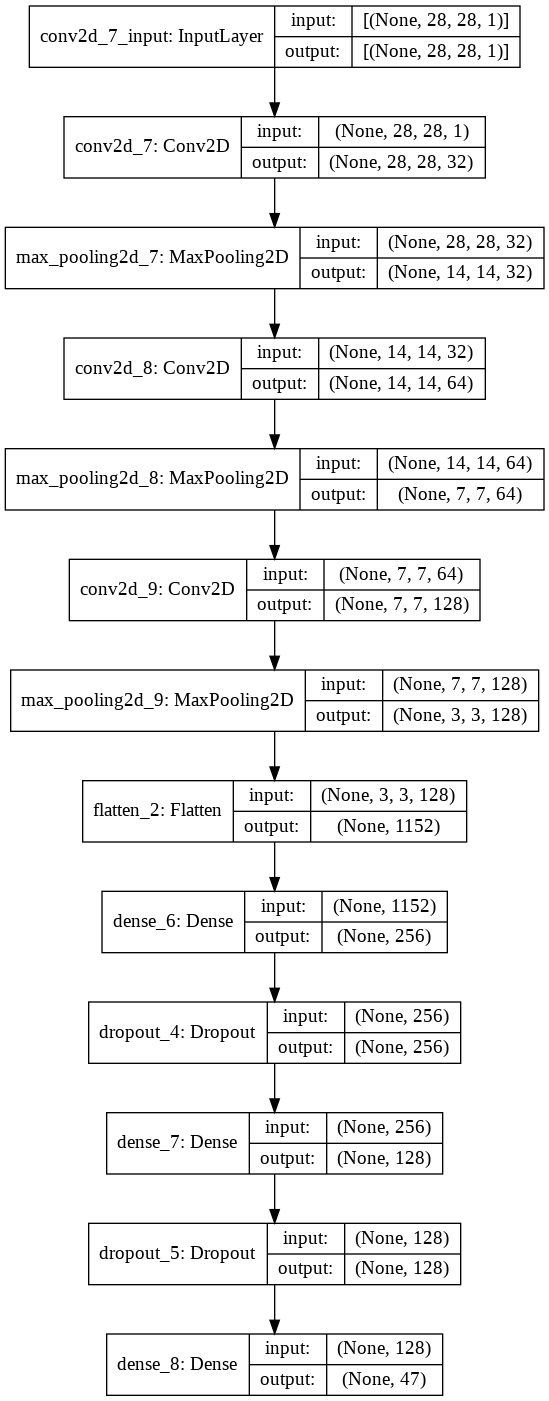

In [ ]:
keras.utils.plot_model(model, "model.png", show_shapes=True)

In [ ]:

from keras import callbacks
earlystopping = callbacks.EarlyStopping(monitor ="val_loss", 
                                        mode ="min", patience = 5, 
                                        restore_best_weights = True)
  
history =model.fit(X_train,y_train, validation_data=(X_val,y_val), epochs=25,batch_size=256,callbacks =[earlystopping])



Epoch 1/25
397/397 [==============================] - 158s 396ms/step - loss: 1.2439 - accuracy: 0.6309 - val_loss: 0.4950 - val_accuracy: 0.8297
Epoch 2/25
397/397 [==============================] - 157s 395ms/step - loss: 0.5470 - accuracy: 0.8162 - val_loss: 0.3943 - val_accuracy: 0.8535
Epoch 3/25
397/397 [==============================] - 157s 395ms/step - loss: 0.4530 - accuracy: 0.8434 - val_loss: 0.3542 - val_accuracy: 0.8719
Epoch 4/25
397/397 [==============================] - 156s 394ms/step - loss: 0.4090 - accuracy: 0.8567 - val_loss: 0.3385 - val_accuracy: 0.8770
Epoch 5/25
397/397 [==============================] - 156s 392ms/step - loss: 0.3794 - accuracy: 0.8656 - val_loss: 0.3402 - val_accuracy: 0.8789
Epoch 6/25
397/397 [==============================] - 156s 392ms/step - loss: 0.3587 - accuracy: 0.8715 - val_loss: 0.3303 - val_accuracy: 0.8784
Epoch 7/25
397/397 [==============================] - 155s 392ms/step - loss: 0.3367 - accuracy: 0.8786 - val_loss: 0.3252 -

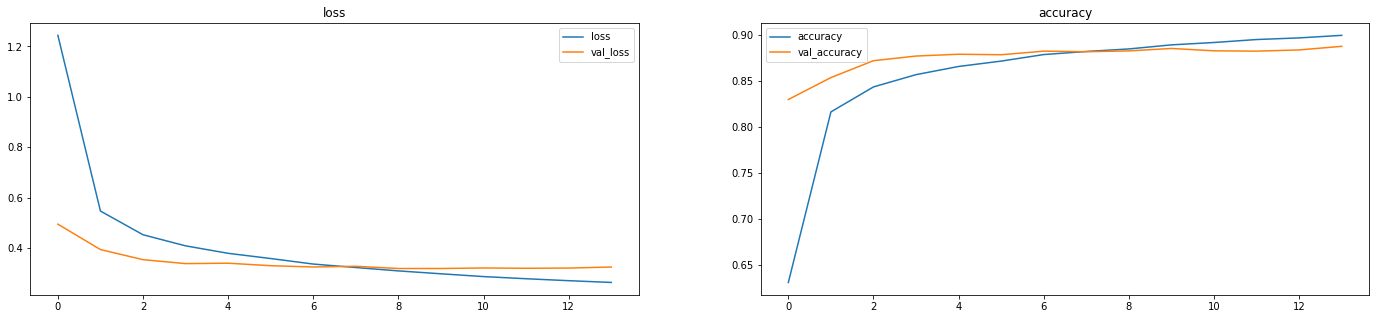

In [ ]:

f,ax=plt.subplots(1,2,figsize=(24,5))
ax[0].plot(pd.DataFrame(model.history.history)[['loss','val_loss']],label=['loss','val_loss'])
ax[0].set_title('loss')
ax[0].legend(['loss', 'val_loss'])
ax[1].plot(pd.DataFrame(model.history.history)[['accuracy','val_accuracy']])
ax[1].set_title('accuracy')
ax[1].legend(['accuracy', 'val_accuracy'])
plt.show()


I used earlystopping as a callback to force the model to stop with the best weight before overfitting the data.

# model evaloution

In [ ]:
from tensorflow.keras.models import load_model

In [ ]:
model.save('my_model.h5') 

In [ ]:
test = pd.read_csv('/content/gdrive/MyDrive/Colab Notebooks/emnist-balanced-test.csv')

In [ ]:
X_test =test.drop('41',axis=1)
X_test=np.asarray(X_test)
X_test=np.apply_along_axis(rotate, 1, X_test)
X_test=X_test/255
X_test =X_test.reshape(-1, 28, 28, 1)

In [ ]:
y_test=test['41']
y_test

0        39
1         9
2        26
3        44
4        33
         ..
18794    45
18795    15
18796     1
18797    26
18798    33
Name: 41, Length: 18799, dtype: int64

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix

In [ ]:
pred=model.predict_classes(X_test)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:455: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [ ]:
model.evaluate(X_test, y_test)

588/588 [==============================] - 10s 17ms/step - loss: 0.3184 - accuracy: 0.8890


[0.31836169958114624, 0.8890366554260254]

In [ ]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.63      0.80      0.71       400
           1       0.57      0.68      0.62       400
           2       0.91      0.89      0.90       400
           3       0.99      0.99      0.99       400
           4       0.94      0.94      0.94       400
           5       0.94      0.93      0.93       400
           6       0.95      0.93      0.94       400
           7       0.97      0.99      0.98       400
           8       0.91      0.95      0.93       400
           9       0.68      0.88      0.76       400
          10       0.98      0.97      0.97       400
          11       0.98      0.97      0.97       400
          12       0.94      0.96      0.95       400
          13       0.95      0.93      0.94       400
          14       0.98      0.99      0.99       400
          15       0.74      0.53      0.62       400
          16       0.95      0.95      0.95       400
          17       0.97    

In [ ]:
matrix=confusion_matrix(y_test,pred)


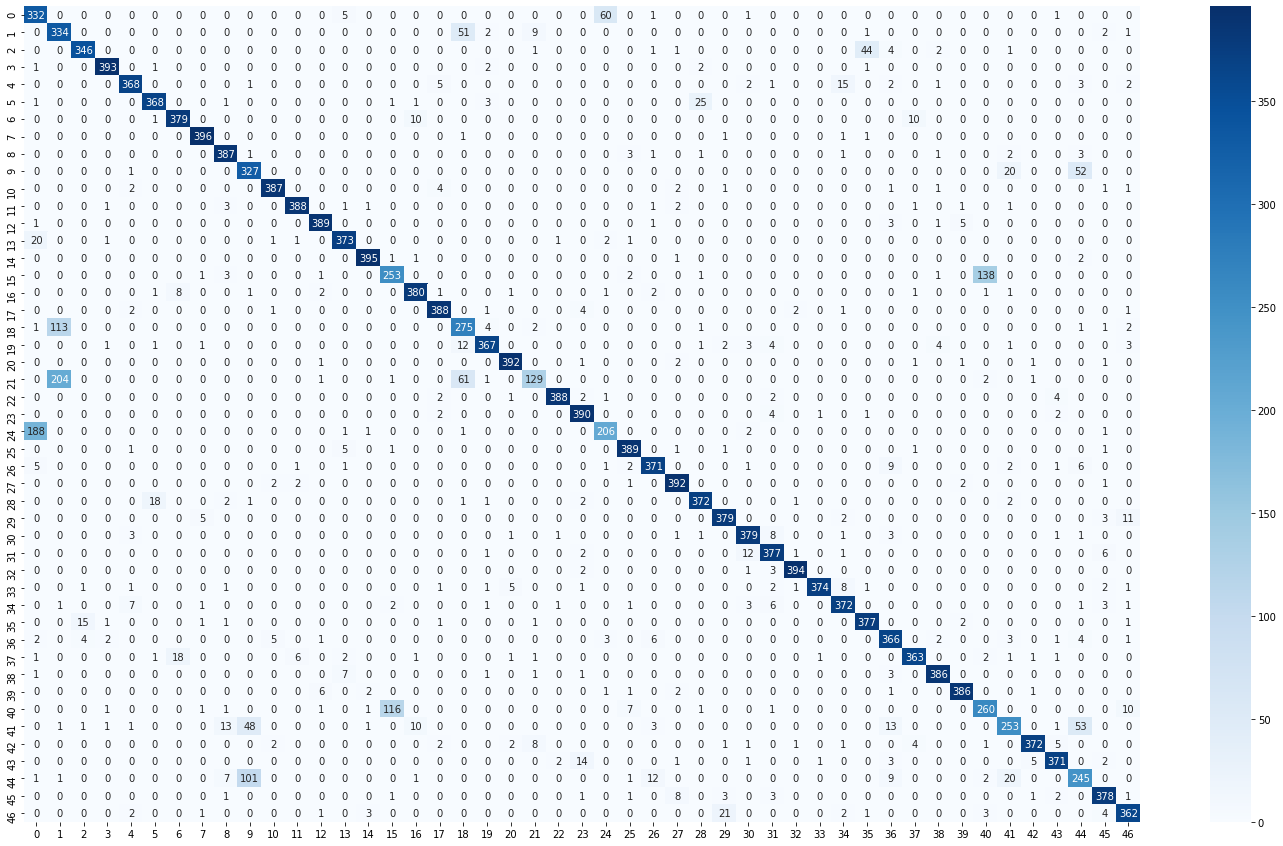

In [ ]:
fig=plt.figure(figsize=(25,15))
sns.heatmap(matrix,annot=True,fmt='d',cmap=plt.cm.Blues)


**high rate of mistake**           
24-0 ||
18-1 || 
21-1 || 
44-9 ||
15-40


In [ ]:
def plot_digits(instances, images_per_row=10, **options):
    size = 28
    images_per_row = min(len(instances), images_per_row)
    images = [instance.reshape(size,size) for instance in instances]
    n_rows = (len(instances) - 1) // images_per_row + 1
    row_images = []
    n_empty = n_rows * images_per_row - len(instances)
    images.append(np.zeros((size, size * n_empty)))
    for row in range(n_rows):
        rimages = images[row * images_per_row : (row + 1) * images_per_row]
        row_images.append(np.concatenate(rimages, axis=1))
    image = np.concatenate(row_images, axis=0)
    plt.imshow(image, cmap = plt.cm.binary, **options)
    plt.axis("off")

In [ ]:
cl_a, cl_b = 0, 24
X_aa = X_test[(y_test == cl_a) & (pred == cl_a)]
X_ab = X_test[(y_test == cl_a) & (pred == cl_b)]
X_ba = X_test[(y_test == cl_b) & (pred == cl_a)]
X_bb = X_test[(y_test == cl_b) & (pred == cl_b)]

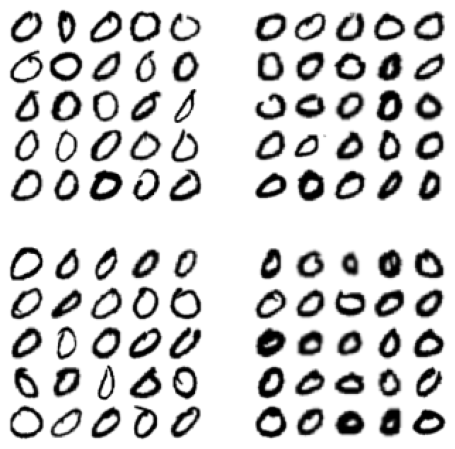

In [ ]:
plt.figure(figsize=(8,8))
plt.subplot(221); plot_digits(X_aa[:25], images_per_row=5)
plt.subplot(222); plot_digits(X_ab[:25], images_per_row=5)
plt.subplot(223); plot_digits(X_ba[:25], images_per_row=5)
plt.subplot(224); plot_digits(X_bb[:25], images_per_row=5)
plt.show()

In [ ]:
cl_a, cl_b = 1, 18
X_aa = X_test[(y_test == cl_a) & (pred == cl_a)]
X_ab = X_test[(y_test == cl_a) & (pred == cl_b)]
X_ba = X_test[(y_test == cl_b) & (pred == cl_a)]
X_bb = X_test[(y_test == cl_b) & (pred == cl_b)]

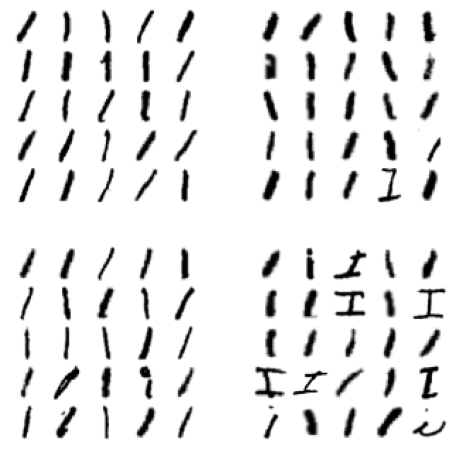

In [ ]:
plt.figure(figsize=(8,8))
plt.subplot(221); plot_digits(X_aa[:25], images_per_row=5)
plt.subplot(222); plot_digits(X_ab[:25], images_per_row=5)
plt.subplot(223); plot_digits(X_ba[:25], images_per_row=5)
plt.subplot(224); plot_digits(X_bb[:25], images_per_row=5)
plt.show()

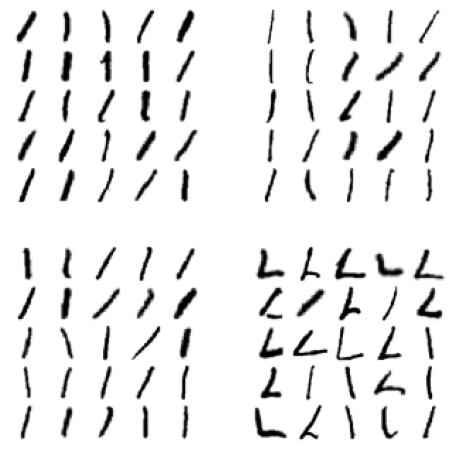

In [ ]:
cl_a, cl_b = 1, 21
X_aa = X_test[(y_test == cl_a) & (pred == cl_a)]
X_ab = X_test[(y_test == cl_a) & (pred == cl_b)]
X_ba = X_test[(y_test == cl_b) & (pred == cl_a)]
X_bb = X_test[(y_test == cl_b) & (pred == cl_b)]
plt.figure(figsize=(8,8))
plt.subplot(221); plot_digits(X_aa[:25], images_per_row=5)
plt.subplot(222); plot_digits(X_ab[:25], images_per_row=5)
plt.subplot(223); plot_digits(X_ba[:25], images_per_row=5)
plt.subplot(224); plot_digits(X_bb[:25], images_per_row=5)
plt.show()

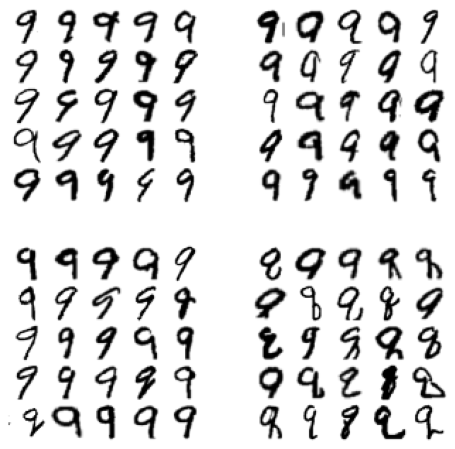

In [ ]:
cl_a, cl_b = 9, 44
X_aa = X_test[(y_test == cl_a) & (pred == cl_a)]
X_ab = X_test[(y_test == cl_a) & (pred == cl_b)]
X_ba = X_test[(y_test == cl_b) & (pred == cl_a)]
X_bb = X_test[(y_test == cl_b) & (pred == cl_b)]
plt.figure(figsize=(8,8))
plt.subplot(221); plot_digits(X_aa[:25], images_per_row=5)
plt.subplot(222); plot_digits(X_ab[:25], images_per_row=5)
plt.subplot(223); plot_digits(X_ba[:25], images_per_row=5)
plt.subplot(224); plot_digits(X_bb[:25], images_per_row=5)
plt.show()

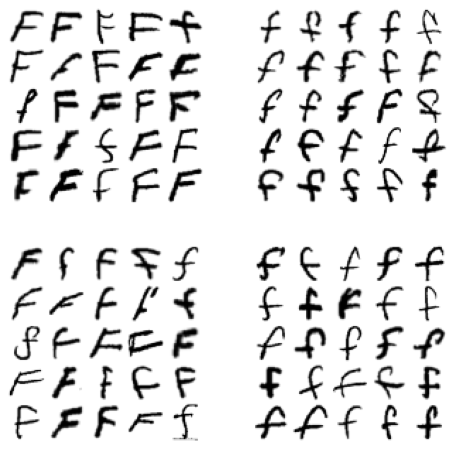

In [ ]:
cl_a, cl_b = 15, 40
X_aa = X_test[(y_test == cl_a) & (pred == cl_a)]
X_ab = X_test[(y_test == cl_a) & (pred == cl_b)]
X_ba = X_test[(y_test == cl_b) & (pred == cl_a)]
X_bb = X_test[(y_test == cl_b) & (pred == cl_b)]
plt.figure(figsize=(8,8))
plt.subplot(221); plot_digits(X_aa[:25], images_per_row=5)
plt.subplot(222); plot_digits(X_ab[:25], images_per_row=5)
plt.subplot(223); plot_digits(X_ba[:25], images_per_row=5)
plt.subplot(224); plot_digits(X_bb[:25], images_per_row=5)
plt.show()

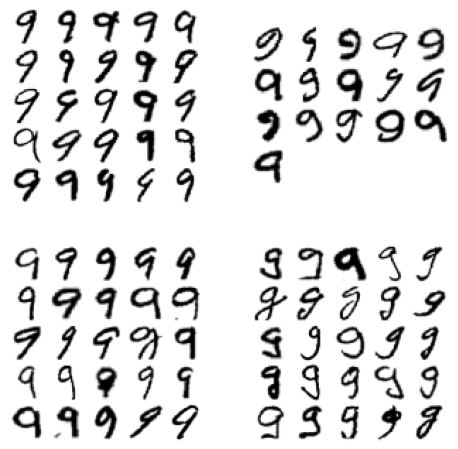

In [ ]:
cl_a, cl_b = 9, 41
X_aa = X_test[(y_test == cl_a) & (pred == cl_a)]
X_ab = X_test[(y_test == cl_a) & (pred == cl_b)]
X_ba = X_test[(y_test == cl_b) & (pred == cl_a)]
X_bb = X_test[(y_test == cl_b) & (pred == cl_b)]
plt.figure(figsize=(8,8))
plt.subplot(221); plot_digits(X_aa[:25], images_per_row=5)
plt.subplot(222); plot_digits(X_ab[:25], images_per_row=5)
plt.subplot(223); plot_digits(X_ba[:25], images_per_row=5)
plt.subplot(224); plot_digits(X_bb[:25], images_per_row=5)
plt.show()

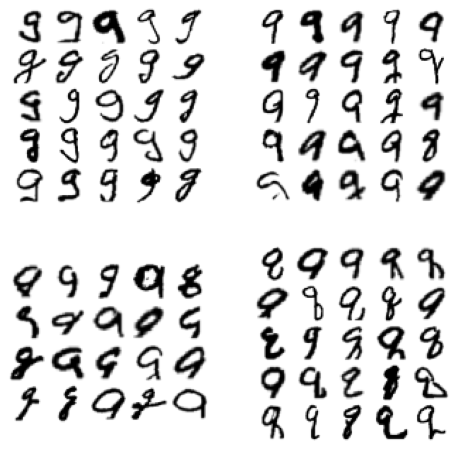

In [ ]:
cl_a, cl_b = 41, 44
X_aa = X_test[(y_test == cl_a) & (pred == cl_a)]
X_ab = X_test[(y_test == cl_a) & (pred == cl_b)]
X_ba = X_test[(y_test == cl_b) & (pred == cl_a)]
X_bb = X_test[(y_test == cl_b) & (pred == cl_b)]
plt.figure(figsize=(8,8))
plt.subplot(221); plot_digits(X_aa[:25], images_per_row=5)
plt.subplot(222); plot_digits(X_ab[:25], images_per_row=5)
plt.subplot(223); plot_digits(X_ba[:25], images_per_row=5)
plt.subplot(224); plot_digits(X_bb[:25], images_per_row=5)
plt.show()

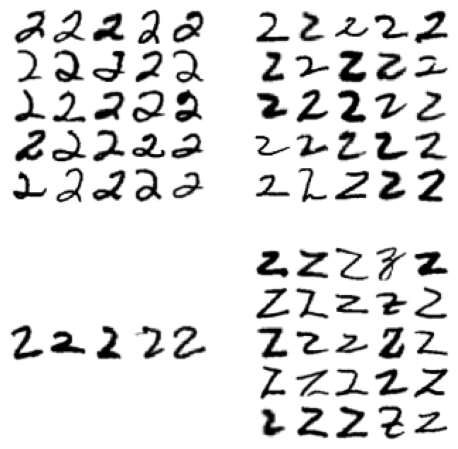

In [ ]:
cl_a, cl_b = 2, 35
X_aa = X_test[(y_test == cl_a) & (pred == cl_a)]
X_ab = X_test[(y_test == cl_a) & (pred == cl_b)]
X_ba = X_test[(y_test == cl_b) & (pred == cl_a)]
X_bb = X_test[(y_test == cl_b) & (pred == cl_b)]
plt.figure(figsize=(8,8))
plt.subplot(221); plot_digits(X_aa[:25], images_per_row=5)
plt.subplot(222); plot_digits(X_ab[:25], images_per_row=5)
plt.subplot(223); plot_digits(X_ba[:25], images_per_row=5)
plt.subplot(224); plot_digits(X_bb[:25], images_per_row=5)
plt.show()

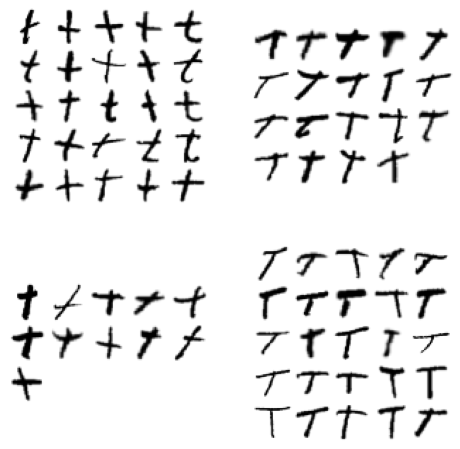

In [ ]:
cl_a, cl_b = 46, 29
X_aa = X_test[(y_test == cl_a) & (pred == cl_a)]
X_ab = X_test[(y_test == cl_a) & (pred == cl_b)]
X_ba = X_test[(y_test == cl_b) & (pred == cl_a)]
X_bb = X_test[(y_test == cl_b) & (pred == cl_b)]
plt.figure(figsize=(8,8))
plt.subplot(221); plot_digits(X_aa[:25], images_per_row=5)
plt.subplot(222); plot_digits(X_ab[:25], images_per_row=5)
plt.subplot(223); plot_digits(X_ba[:25], images_per_row=5)
plt.subplot(224); plot_digits(X_bb[:25], images_per_row=5)
plt.show()